In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [6]:
def relu(x):
    return x * (x > 0)

def lasso(x, reg=0.1):
    if x > reg:
        return x - reg
    elif x < -reg:
        return x + reg
    else:
        return 0

def betalasso(x, reg=0.1, beta=50):
    if x > beta*reg:
        return x - reg
    elif x < -beta*reg:
        return x + reg
    else:
        return 0

def betalasso2(x, reg=0.1, beta=50):
    xnew = x - reg * np.sign(x)
    xnew *= (np.abs(x) >= (beta * reg))
    return xnew

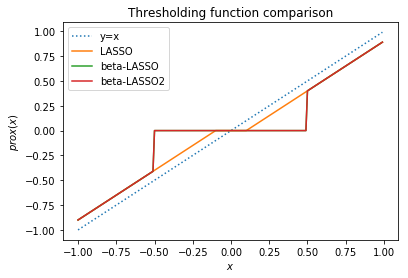

In [7]:
reg = 0.1
beta = 5
n = 1
eps = reg / 10.0
xs = np.arange(-n, n, eps)
ys_lasso = np.array([lasso(x, reg) for x in xs])
ys_betalasso = np.array([betalasso(x, reg, beta) for x in xs])
ys_betalasso2 = np.array([betalasso2(x, reg, beta) for x in xs])

plt.plot(xs, xs, label='y=x', linestyle=':')
plt.plot(xs, ys_lasso, label='LASSO')
plt.plot(xs, ys_betalasso, label='beta-LASSO')
plt.plot(xs, ys_betalasso2, label='beta-LASSO2')

plt.title('Thresholding function comparison')
plt.xlabel('$x$')
plt.ylabel('$prox(x)$')
plt.legend()
plt.show()